<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Introduction to Computer Vision - Convolutional Neural Networks</center></h1>

<center><p float="center">
  <img src="https://cdn.pixabay.com/photo/2020/03/16/16/29/virus-4937553_1280.jpg" width="720"/>
</p></center>

<center><font size=6>Covid-19 Image Classification</font></center>

# Problem Statement

## Business Context

COVID-19 is a rapidly spreading disease that severely impacts human health, often leading to lung infections. While vaccines help strengthen immunity, their effects take time. The virus has also had a significant impact on economies worldwide.  

Advancements in technology now assist healthcare professionals in analyzing medical images for better diagnosis. By examining lung X-rays, these methods can help differentiate between healthy individuals, common respiratory infections, and COVID-19, supporting more accurate medical assessments.

## Objective

The aim of this project is to Build a Convolutional Neural Network to differentiate an X-ray image of a person affected with covid from that of a healthy person or a person who has viral pneumonia(fever).

## Data Description

This dataset contains training set images of 3 classes which are converted into numpy arrays.


**COVID-19:** The patient who is effected due to covid.

**Viral Pneumonia:** This is a viral fever which has similar characteristics like fever and cought that of Covid but is not covid.

**Normal:** A healthy Person with no symptoms of covid or fever.

The data file names are:

- CovidImages.npy

- CovidLabels.csv




####**Note: Please use GPU runtime to execute the code efficiently**


# Installing and Importing the necessary libraries

In [ ]:
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# Loading the Data

In [ ]:
# Uncomment and run the following code in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the image file of the dataset
images = np.load('CovidImages.npy')

# Load the labels file of the dataset
labels = pd.read_csv('CovidLabels.csv')

# Data Overview


Let's print the shape of the images and labels

In [ ]:
print(images.shape)
print(labels.shape)

(251, 128, 128, 3)
(251, 1)


There are 251 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

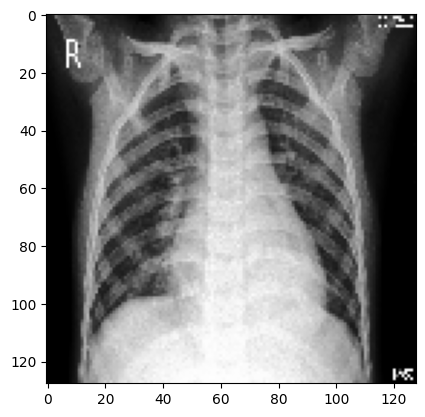

In [ ]:
plt.imshow(images[5])

# Exploratory Data Analysis

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

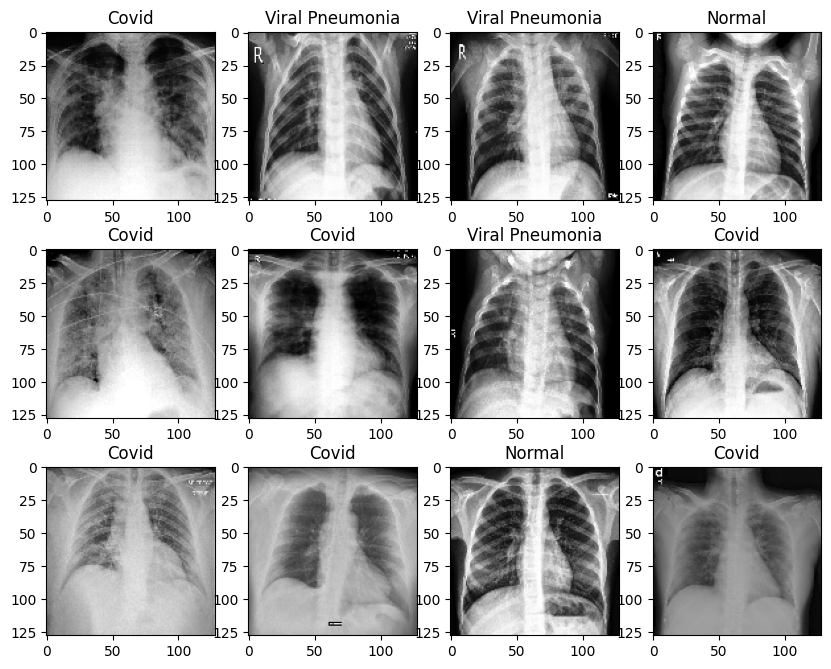

In [ ]:
plot_images(images,labels)

## Checking for data imbalance

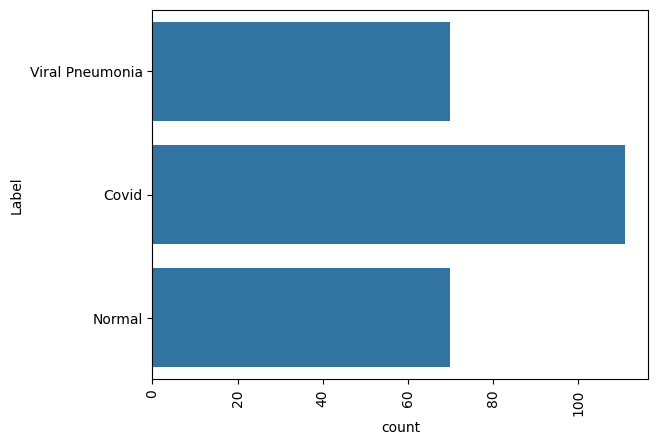

In [ ]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical');

- As you can see from the above plot, the classes are quite imbbalanced.

# Data Preprocessing

## Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

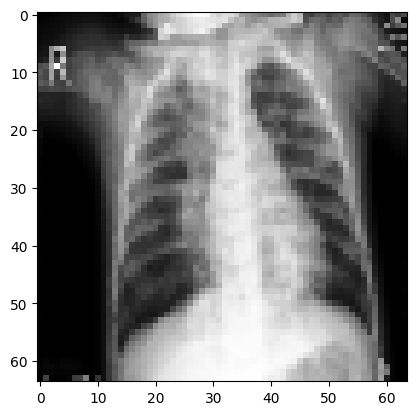

In [ ]:
plt.imshow(images_decreased[3]);

## Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
    images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))

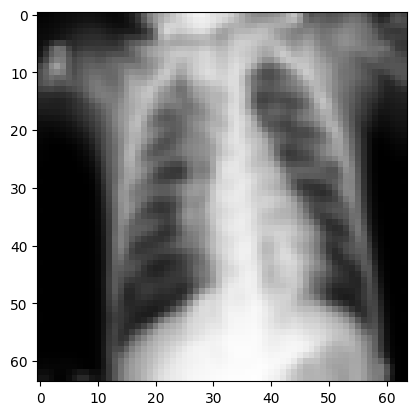

In [ ]:
plt.imshow(images_gb[3]);

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## Splitting the dataset



- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the `train_test_split()` function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(200, 64, 64, 3) (200, 1)
(25, 64, 64, 3) (25, 1)
(26, 64, 64, 3) (26, 1)


## Encoding the target labels

- Convert labels from names to one hot vectors


In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# Model Building

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [ ]:
def plot_confusion_matrix(model,predictors,target):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

## Model 1 (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.


In [ ]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model_1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(3, activation='softmax'))

In [ ]:
opt=Adam()
# Compile model
# Other metrics like precision,f1_score,recall can be used
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 14720835 (56.16 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
# Epochs
epochs = 20
# Batch size
batch_size = 128

history_vgg16 = model_1.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 1.1769 - accuracy: 0.5156 - val_loss: 1.1495 - val_accuracy: 0.4400
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.0609 - accuracy: 0.5156 - val_loss: 1.0443 - val_accuracy: 0.4400
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 0.9785 - accuracy: 0.5156 - val_loss: 0.9785 - val_accuracy: 0.4000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.0397 - accuracy: 0.3194 - val_loss: 0.9359 - val_accuracy: 0.6400
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.9617 - accuracy: 0.6111 - val_loss: 0.9170 - val_accuracy: 0.6800
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.9040 - accuracy: 0.7083 - val_loss: 0.9112 - val_accuracy: 0.7200
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.9278 - accuracy: 0.6172 - val_loss: 0.8888 - val_accuracy: 0.7200
Epoch 8/20
1/1 [=========================

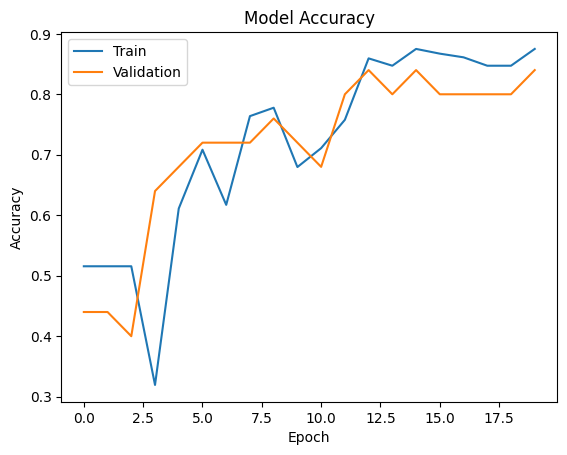

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

7/7 [==============================] - 5s 615ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0     0.895   0.895    0.89547  0.893596


7/7 [==============================] - 5s 678ms/step


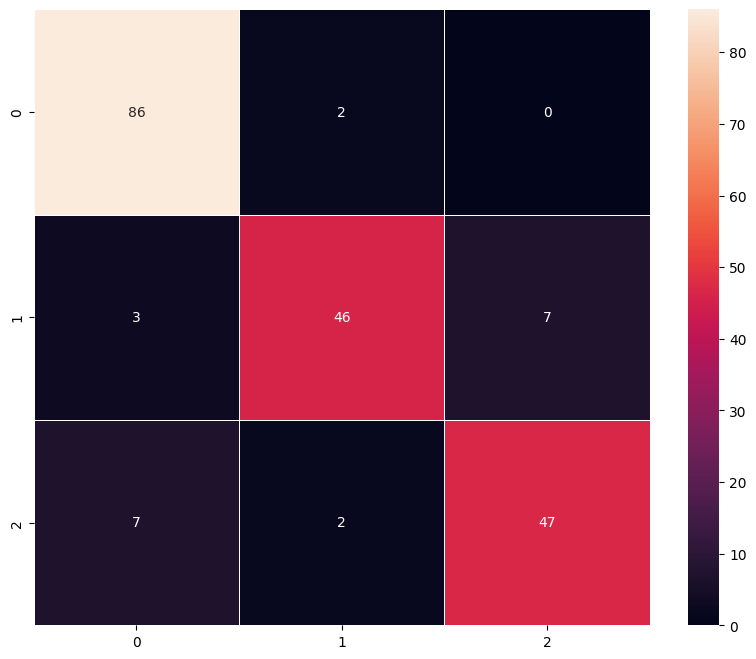

In [ ]:
plot_confusion_matrix(model_1,X_train_normalized,y_train_encoded)

In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

1/1 [==============================] - 1s 633ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.84    0.84   0.882667  0.820308


1/1 [==============================] - 1s 877ms/step


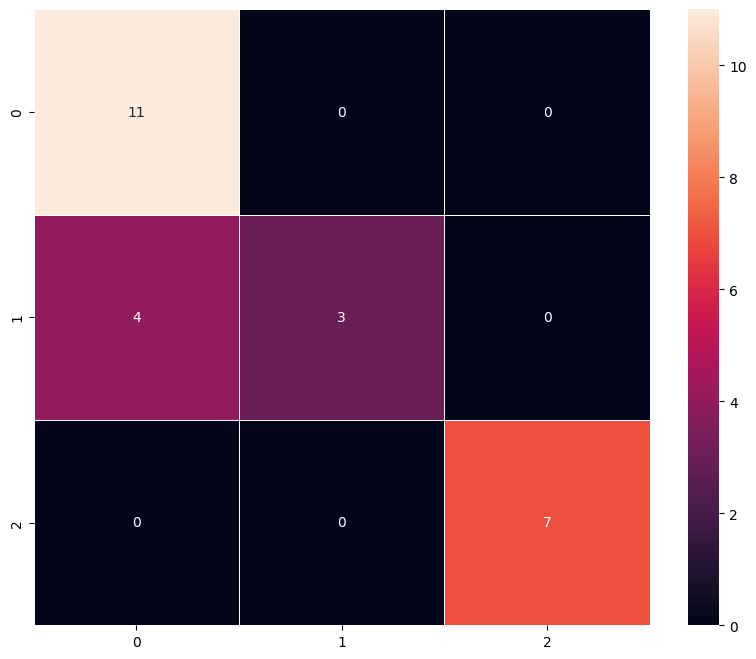

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

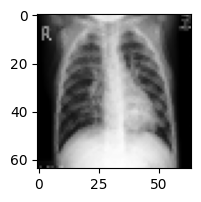

1/1 [==============================] - 0s 57ms/step
Predicted Label ['Viral Pneumonia']
True Label Viral Pneumonia


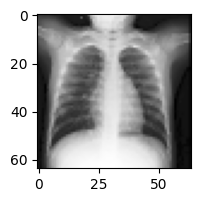

1/1 [==============================] - 0s 63ms/step
Predicted Label ['Covid']
True Label Normal


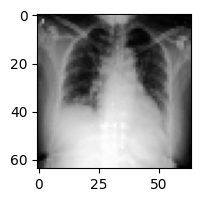

1/1 [==============================] - 0s 56ms/step
Predicted Label ['Covid']
True Label Covid


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[10])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[10].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[10])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[23])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[23].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[23])                                              # using inverse_transform() to get the output label from the output vector

## Model 2 (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.


In [ ]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_2.add(Dense(3, activation='softmax'))

In [ ]:
opt = Adam()

In [ ]:
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                8224      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 15247555 (58.16 MB)
Trainable params: 53

In [ ]:
history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.2933 - accuracy: 0.2361 - val_loss: 1.0948 - val_accuracy: 0.2800
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 1.2271 - accuracy: 0.2969 - val_loss: 0.8557 - val_accuracy: 0.7600
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.8572 - accuracy: 0.5833 - val_loss: 0.7739 - val_accuracy: 0.8400
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.8460 - accuracy: 0.6806 - val_loss: 0.6973 - val_accuracy: 0.8000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.7186 - accuracy: 0.7578 - val_loss: 0.6265 - val_accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 0.6302 - accuracy: 0.8281 - val_loss: 0.5614 - val_accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.6010 - accuracy: 0.8194 - val_loss: 0.4874 - val_accuracy: 0.8800
Epoch 8/20
1/1 [=========================

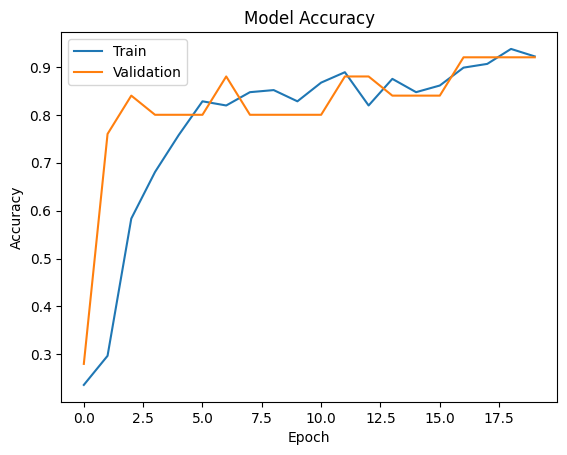

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

7/7 [==============================] - 5s 653ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.94    0.94   0.942086  0.940426


7/7 [==============================] - 4s 568ms/step


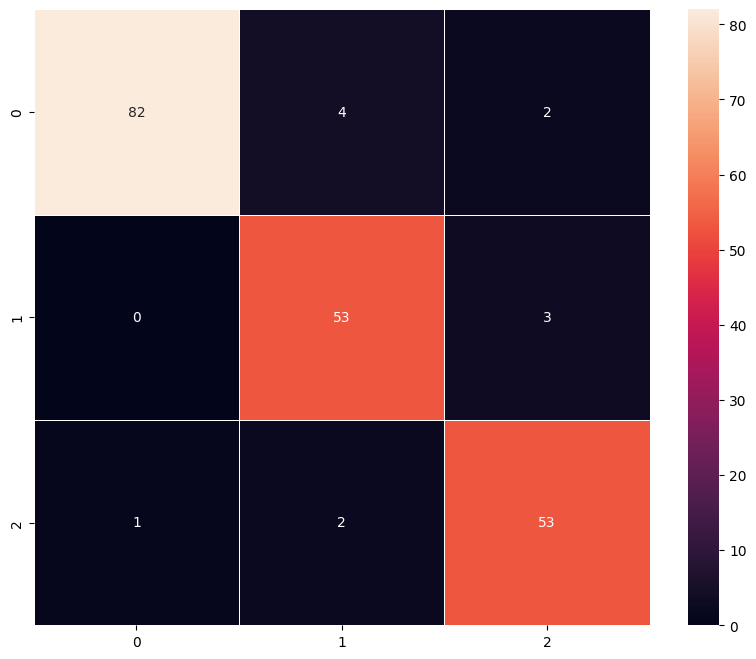

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train_encoded)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

1/1 [==============================] - 1s 525ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.92    0.92      0.925  0.919795


1/1 [==============================] - 1s 519ms/step


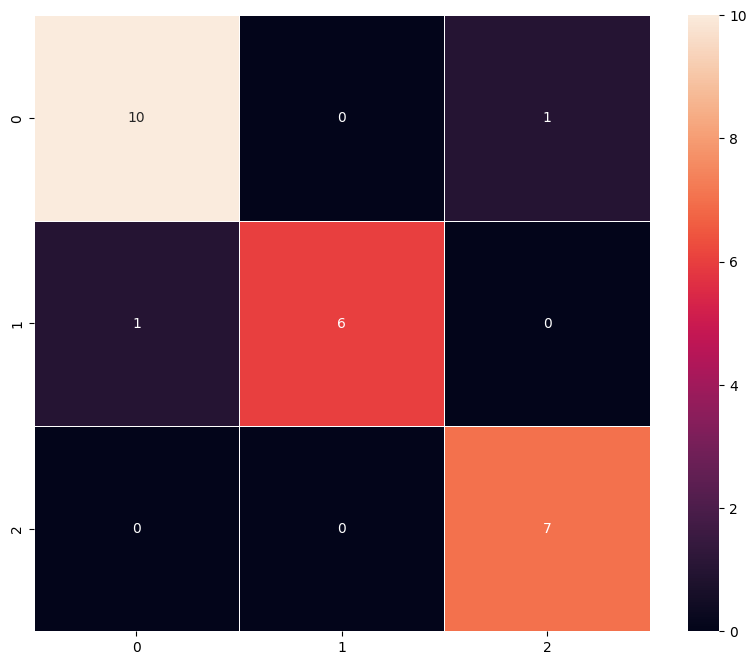

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

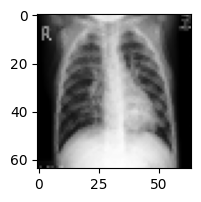

1/1 [==============================] - 0s 65ms/step
Predicted Label ['Viral Pneumonia']
True Label Viral Pneumonia


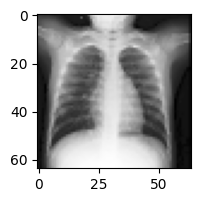

1/1 [==============================] - 0s 60ms/step
Predicted Label ['Covid']
True Label Normal


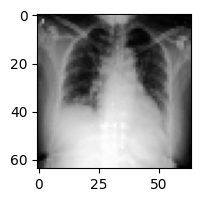

1/1 [==============================] - 0s 57ms/step
Predicted Label ['Covid']
True Label Covid


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[10])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[10].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[10])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[23])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[23].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[23])                                              # using inverse_transform() to get the output label from the output vector

## Model 3 (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(3, activation='softmax'))

In [ ]:
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                8224      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 15247555 (58.16 MB)
Trainable params: 53

In [ ]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [ ]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.0819 - accuracy: 0.4167 - val_loss: 0.8901 - val_accuracy: 0.7200
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.9793 - accuracy: 0.4861 - val_loss: 0.8262 - val_accuracy: 0.6800
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.9382 - accuracy: 0.5556 - val_loss: 0.9996 - val_accuracy: 0.5200
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.8808 - accuracy: 0.5556 - val_loss: 0.8276 - val_accuracy: 0.6400
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 1.0547 - accuracy: 0.5312 - val_loss: 0.5246 - val_accuracy: 0.7600
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.8079 - accuracy: 0.6111 - val_loss: 0.4897 - val_accuracy: 0.8400
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.8142 - accuracy: 0.5694 - val_loss: 0.4906 - val_accuracy: 0.8800
Epoch 8/20
1/1 [=========================

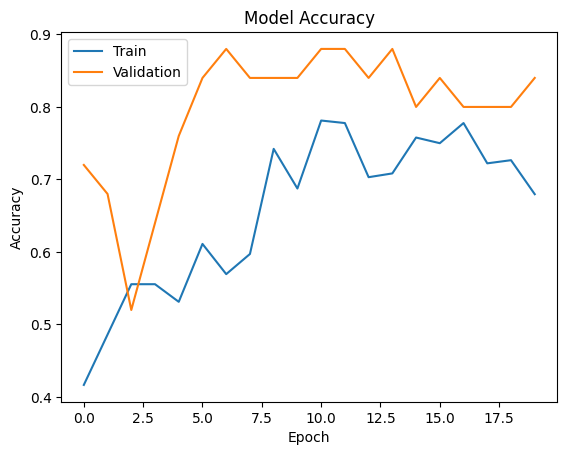

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

7/7 [==============================] - 5s 713ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0     0.805   0.805   0.835557  0.810706


7/7 [==============================] - 4s 562ms/step


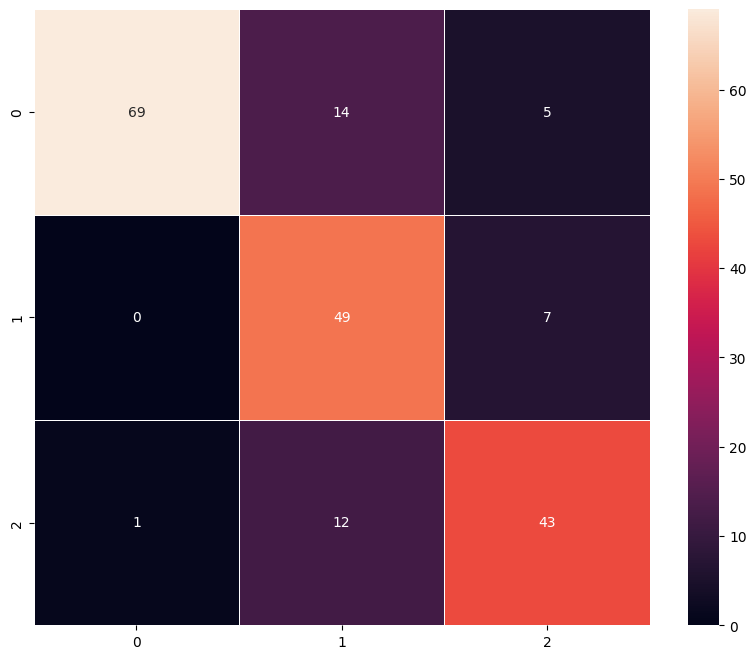

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train_encoded)

In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

1/1 [==============================] - 1s 516ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.84    0.84       0.86     0.844


1/1 [==============================] - 1s 525ms/step


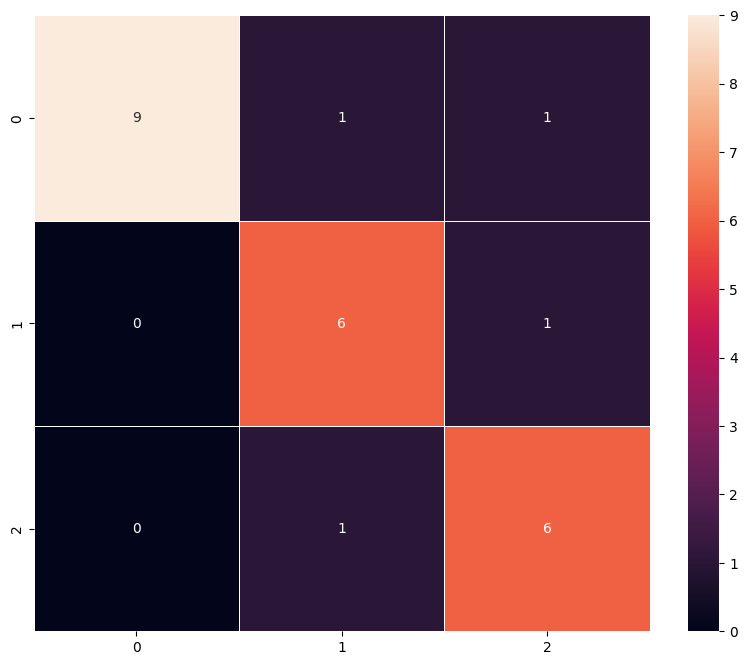

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

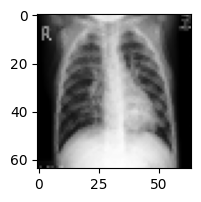

1/1 [==============================] - 0s 59ms/step
Predicted Label ['Viral Pneumonia']
True Label Viral Pneumonia


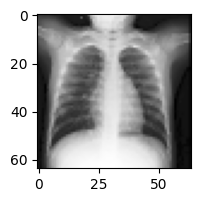

1/1 [==============================] - 0s 56ms/step
Predicted Label ['Covid']
True Label Normal


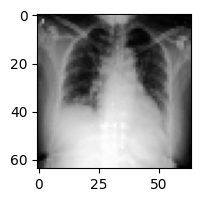

1/1 [==============================] - 0s 52ms/step
Predicted Label ['Covid']
True Label Covid


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[10])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[10].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[10])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[23])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[23].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[23])                                              # using inverse_transform() to get the output label from the output vector

# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_train_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.895000,0.940000,0.805000
Recall,0.895000,0.940000,0.805000
Precision,0.895470,0.942086,0.835557
F1 Score,0.893596,0.940426,0.810706


In [ ]:
models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.840000,0.920000,0.840
Recall,0.840000,0.920000,0.840
Precision,0.882667,0.925000,0.860
F1 Score,0.820308,0.919795,0.844


In [ ]:
models_train_comp_df - models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.055000,0.020000,-0.035000
Recall,0.055000,0.020000,-0.035000
Precision,0.012804,0.017086,-0.024443
F1 Score,0.073288,0.020631,-0.033294


- VGG-16 (Base+FFNN) has achieved the highest performance on both the training and validation sets.  

- Also, the difference between the training and validation scores for all models is very small, indicating that they have all generalized well.  

- We will proceed with VGG-16 (Base+FFNN) as our final model.

### Test Performance

In [ ]:
model_2_test_perf = model_performance_classification(model_2, X_test_normalized,y_test_encoded)

1/1 [==============================] - 1s 556ms/step


In [ ]:
model_2_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.961538,0.961538,0.966346,0.961984


1/1 [==============================] - 1s 567ms/step


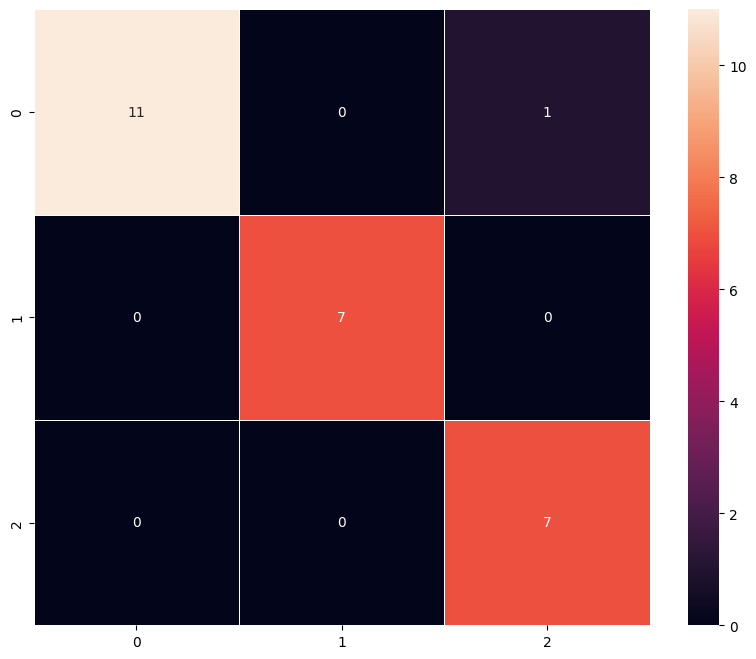

In [ ]:
plot_confusion_matrix(model_2, X_test_normalized,y_test_encoded)

# Business Insights and Recommendations

- The VGG-16 (Base) model performed well on the training data, achieving a train accuracy of ~0.94 and a validation F1-score of ~0.92. This indicates that the pre-trained features were quite valuable for this dataset.

- Adding a feed-forward neural network on top of the VGG-16 model significantly improved performance. This suggests that while the pre-trained features were beneficial, further refining them with an additional neural network tailored to our dataset enhanced the results.


- Although the performance of Model 3 is not on par with Models 1 and 2, it does not suffer from overfitting.

- These models can be further improved by training with different filter sizes and different number of filters.

- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.

- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.

- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.

<font size=5 color='blue'>Power Ahead!</font>
___